Group 5 members: Data Science and AI
Juliet Sackey
Kaouter Labed
Monica Atuorah
Naomi Odidi
Louisa Bonsu
Oluwafunmilayo Oluyemi
Kehinde Adebisi
Nwajiunor Edgar
Kawthar Oyolola
Ndidiamaka Eneje


### importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

### Loading and reading the dataset

In [2]:

carprice=pd.read_csv('carprices.csv')
carprice

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### Cleaning the dataset

In [3]:
#renaming the colunmns
carprice.columns=('Model','Mileage','Price','Years')
carprice.columns

Index(['Model', 'Mileage', 'Price', 'Years'], dtype='object')

In [4]:
carprice

,Model,Mileage,Price,Years
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


### visualization

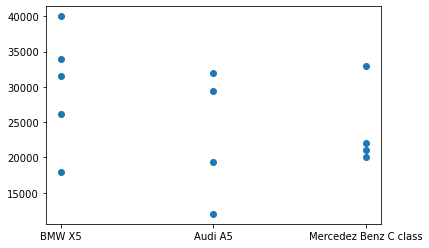

In [5]:
#ploting scatter point
plt.scatter(carprice.Model,carprice.Price);


### Getting Dummy varaibles with pandas

In [6]:
#Getting dummy variables with pandas
dummies = pd.get_dummies(carprice.Model)
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [7]:
#Merging the dummmy to the original dataset
join=pd.concat([carprice,dummies],axis='columns')
join

,Model,Mileage,Price,Years,Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [8]:
#dropping the Model columns
car=join.drop(['Model'], axis='columns')
car

,Mileage,Price,Years,Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [9]:
#To avaoid  multi-colinear, we drop Mercedes Benz C class columns
car_Model=car.drop(['Mercedez Benz C class'],axis='columns')
car_Model

,Mileage,Price,Years,Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [10]:
#since we are working on the price colmun , we drop it
car_price=car_Model.drop('Price',axis='columns')
car_price


,Mileage,Years,Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [11]:
y=car_Model['Price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Price, dtype: int64

### Model training and prediction

In [12]:
#training the model based on the dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(car_price,y)

LinearRegression()

In [13]:
#determine the accuracy score of the model
model.score(car_price,y)

0.9417050937281083

In [14]:
#1Predict price of a mercedez benz that is 4 yr old with mileage 45000
model.predict([[45000,4,0,0]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [15]:
#2) Predict price of a BMW X5 that is 7 yr old with mileage 86000
model.predict([[86000,7,0,1]])

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [16]:
#3) Tell me the score (accuracy) of your model. (Hint: use LinearRegression().score())
model.score(car_price,y)

0.9417050937281083